# Netflix Movies and TV Shows

.

###  Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Read Dataset

In [2]:
# read csv file
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Perbandingan Jumlah Seluruh Movie dan TV Show yang Rilis di Netflix 

In [6]:
# Menghitung jumlah masing-masing nilai dalam kolom 'type'
new = df['type'].value_counts()
new

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Text(0.5, 1.0, 'Persentase Jumlah Seluruh Movie dan TV Show yang Rilis di Netflix ')

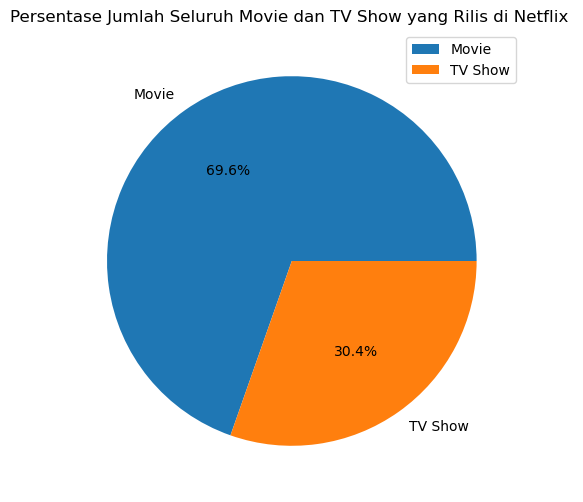

In [5]:
# Visualisasi Pie Chart
plt.figure(figsize=(12, 6)) 
new.plot(kind='pie',autopct='%1.1f%%',legend=True)
plt.ylabel('')
plt.title('Persentase Jumlah Seluruh Movie dan TV Show yang Rilis di Netflix ')


### Perbandingan frekuensi Movie dan TV Show yang Rilis di Netflix dari tahun 2000

Text(0, 0.5, 'freq release')

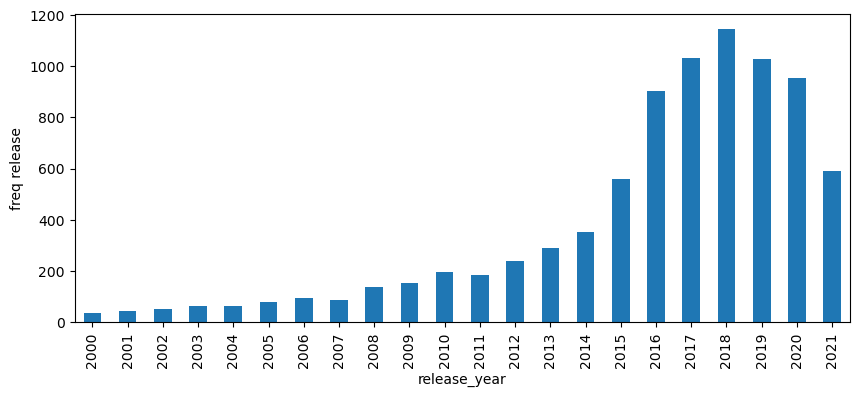

In [3]:
y = df['release_year'].value_counts()
y = y.sort_index()
plt.figure(figsize=(10,4))
y[-22:].plot(kind='bar')
plt.ylabel('freq release')



In [22]:
# Pivot data untuk menghitung jumlah tipe konten per tahun
d = df.pivot_table(index='release_year', columns='type', aggfunc='size', fill_value=0)[-22:]
d


type,Movie,TV Show
release_year,,
2000,33,4
2001,40,5
2002,44,7
2003,51,10
2004,55,9
2005,67,13
2006,82,14
2007,74,14
2008,113,23


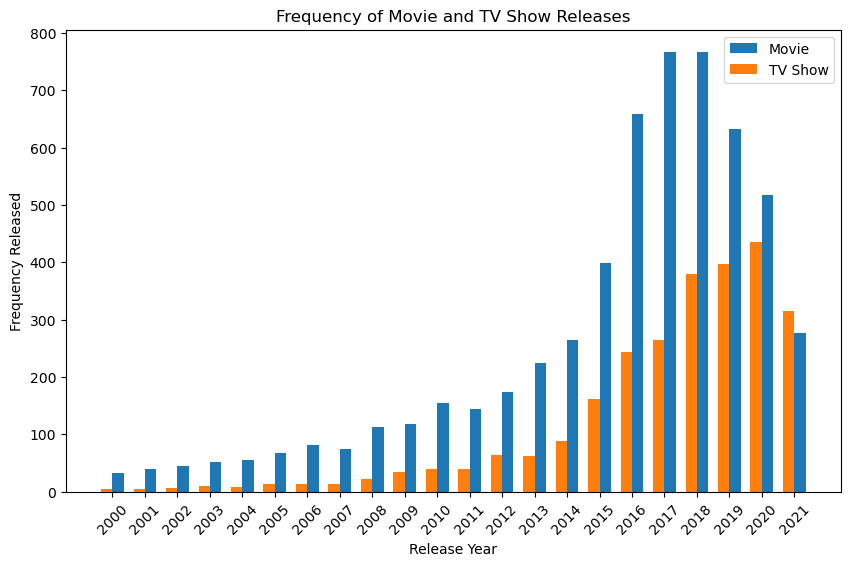

In [23]:
# Visualisas Data 

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Lebar setiap bar

# Plot bar Movie
ax.bar(d.index + bar_width/2, d['Movie'], bar_width, label='Movie')

# Plot bar TV Show
ax.bar(d.index - bar_width/2, d['TV Show'], bar_width, label='TV Show')

# Menampilkan setiap tahun pada sumbu x
ax.set_xticks(d.index)
ax.set_xticklabels(d.index, rotation=45)

# Atur label sumbu x
ax.set_xlabel('Release Year')

# Atur label sumbu y
ax.set_ylabel('Frequency Released')

# Atur judul plot
ax.set_title('Frequency of Movie and TV Show Releases')

# Menambahkan legenda
ax.legend()




### Perbandingan rating di show Netflix

In [7]:
a = df['rating'].value_counts().reset_index()
r = a[~a['rating'].str.contains('min')][:4]
agg = a['count'].sum() - r['count'].sum()
r.loc[len(r)] = {'rating':'others','count':agg}

r

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,others,1774


[Text(0.0, 0, 'TV-MA'),
 Text(1.0, 0, 'TV-14'),
 Text(2.0, 0, 'TV-PG'),
 Text(3.0, 0, 'R'),
 Text(4.0, 0, 'others')]

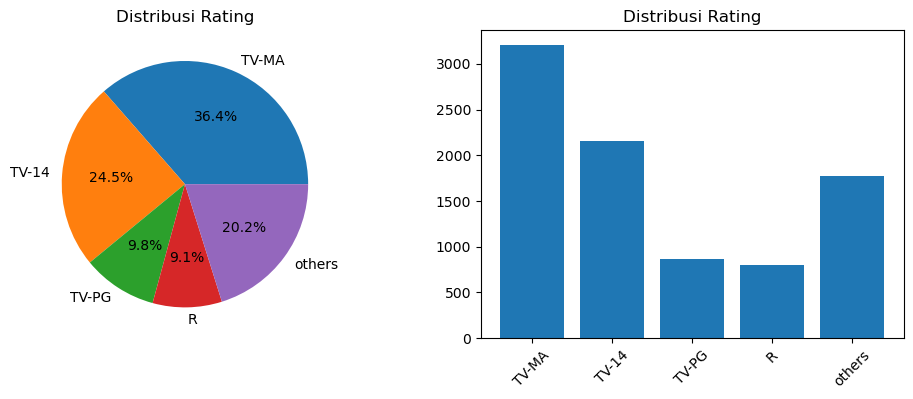

In [9]:
#visualisasi data 
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].pie(r['count'], labels=r['rating'], autopct='%1.1f%%')
# ax[0].legend()
ax[0].set_title('Distribusi Rating')

ax[1].bar(r['rating'],r['count'])
ax[1].set_title('Distribusi Rating')
ax[1].set_xticks(r['rating'])
ax[1].set_xticklabels(r['rating'], rotation=45)



In [12]:

# perbandingan rating tiap tiap tipe show
a = df.pivot_table(index='rating',columns='type',aggfunc='size')
a = a.sort_values('Movie')
a['TV Show'].fillna(0,inplace=True)
a =  a[~a.index.str.contains('min')]

a

type,Movie,TV Show
rating,,
NC-17,3.0,0.0
UR,3.0,0.0
TV-Y7-FV,5.0,1.0
G,41.0,0.0
NR,75.0,5.0
TV-G,126.0,94.0
TV-Y,131.0,176.0
TV-Y7,139.0,195.0
PG,287.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

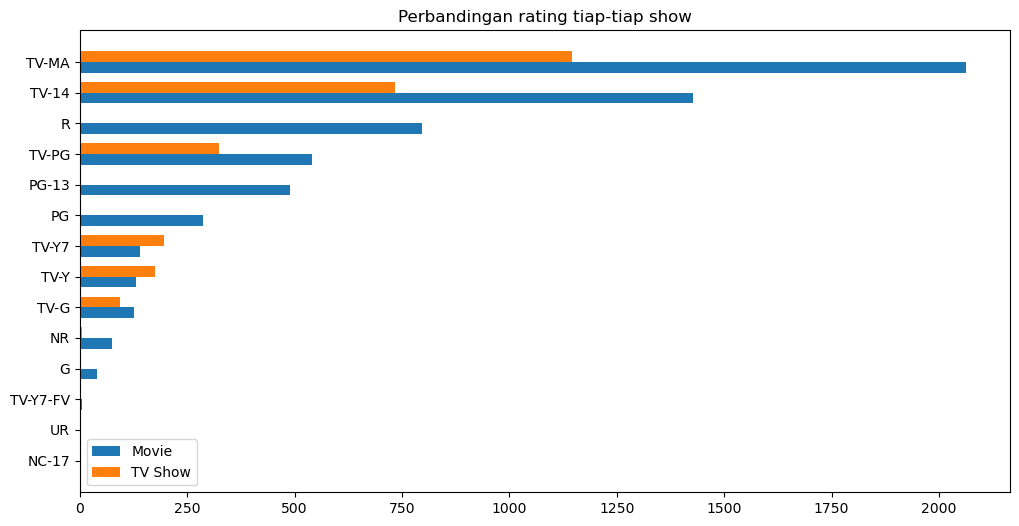

In [13]:
#visualisasi data

fig, ax = plt.subplots(figsize=(12, 6))
# Lebar bar
bar_width = 0.35
# Plot bar Movie
ax.barh(a.index, a['Movie'], bar_width, label='Movie')

# Plot bar TV Show dengan posisi yang disesuaikan
ax.barh([idx + bar_width for idx in range(len(a.index))], a['TV Show'], bar_width, label='TV Show')

ax.set_yticks([idx + bar_width / 2 for idx in range(len(a.index))])
ax.set_yticklabels(a.index)
ax.set_title('Perbandingan rating tiap-tiap show')
ax.legend()
plt.show

### Frekuensi Season di TV Show di Netflix 

In [14]:
new = df[df['type'] == 'TV Show']
new = new.groupby(['duration'])['duration'].value_counts().reset_index()
new = new.replace('17 Seasons','16 Seasons')
new = new.sort_values(by='count', ascending=False).set_index('duration')

new

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
4 Seasons,95
5 Seasons,65
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9


[Text(0.0, 0, '1 Season'),
 Text(1.0, 0, '2 Seasons'),
 Text(2.0, 0, '3 Seasons'),
 Text(3.0, 0, '4 Seasons'),
 Text(4.0, 0, '5 Seasons'),
 Text(5.0, 0, '6 Seasons'),
 Text(6.0, 0, '7 Seasons'),
 Text(7.0, 0, '8 Seasons'),
 Text(8.0, 0, '9 Seasons'),
 Text(9.0, 0, '10 Seasons'),
 Text(10.0, 0, '13 Seasons'),
 Text(11.0, 0, '11 Seasons'),
 Text(12.0, 0, '12 Seasons'),
 Text(13.0, 0, '15 Seasons'),
 Text(14.0, 0, '16 Seasons')]

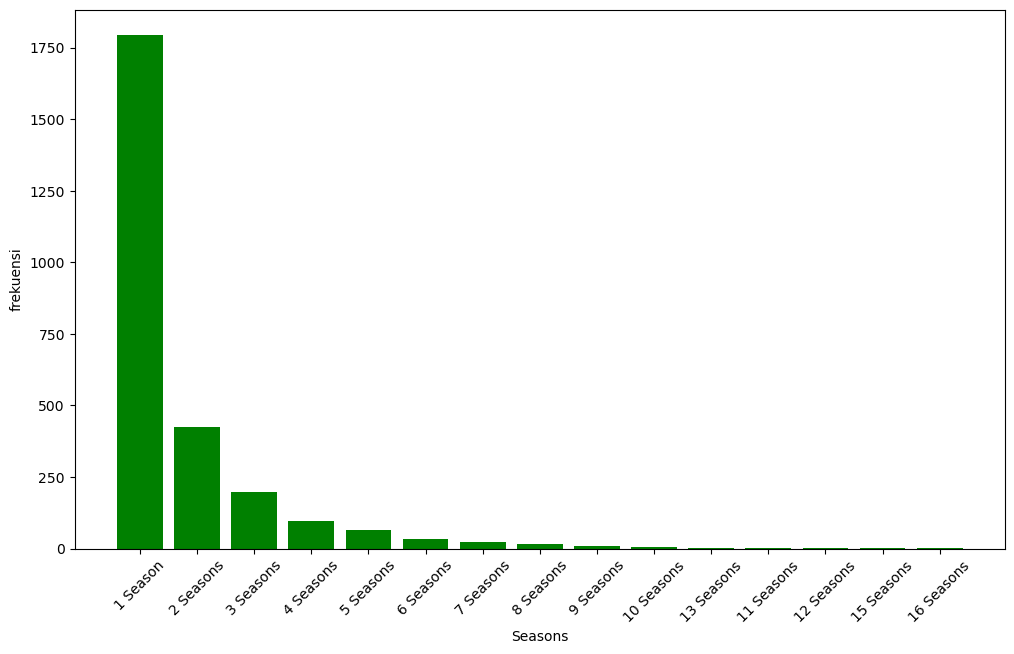

In [15]:
#visualisasi  data

fig, ax = plt.subplots(figsize=(12,7))
ax.bar(new.index,new['count'],color='green')
ax.set_xlabel('Seasons')
ax.set_ylabel('frekuensi')
ax.set_xticks(new.index)
ax.set_xticklabels(new.index, rotation=45)

### Negara yang meriis TV Show di Netflix

In [16]:
new = df[df['type'] == 'TV Show']
new = new.dropna(subset=['country'])
new['country'] = new['country'].str.split(',').str[0]
new = new.groupby(['country'])['country'].value_counts().reset_index()
new = new.sort_values('count').set_index('country')
other = new[new['count'] <= 20].sum()['count']
new.loc['other'] = {'count':other}
new = new[new['count'] > 20]
new



,count
country,
Thailand,24
Germany,25
Colombia,25
Brazil,28
Turkey,30
China,41
Mexico,48
Spain,52
Australia,56


Text(0.5, 1.0, 'Negara yang Merilis TV Show di Netflix')

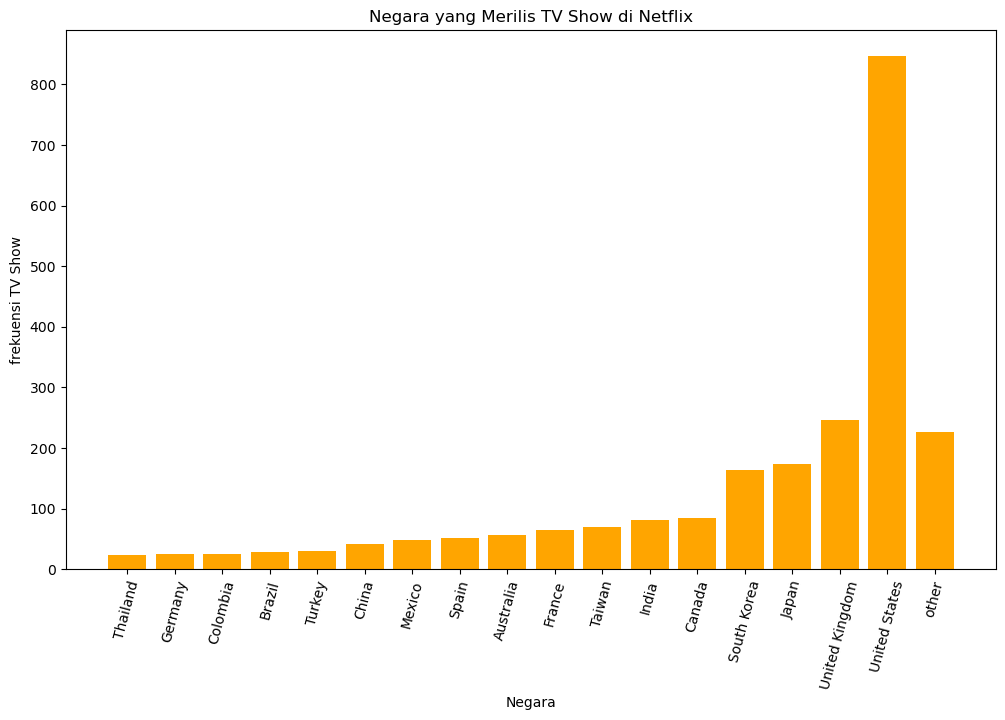

In [17]:
# Visualisasi Data 
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(new.index,new['count'],color='orange')
ax.set_xlabel('Negara')
ax.set_ylabel('frekuensi TV Show')
ax.set_xticks(new.index)
ax.set_xticklabels(new.index, rotation=75)
ax.set_title('Negara yang Merilis TV Show di Netflix')

### Movie di Netflix

In [19]:
new = df[df['type'] == 'Movie']
new = new.dropna(subset=['country'])
new['country'] = new['country'].str.split(',').str[0]
new = new.groupby(['country'])['country'].value_counts().reset_index()
new = new.sort_values('count').set_index('country')
other = new[new['count'] <= 20].sum()['count']
new.loc['other'] = {'count':other}
new = new[new['count'] > 20]
new



,count
country,
Poland,22
Ireland,22
Netherlands,23
South Africa,35
Thailand,41
South Korea,47
Italy,48
Brazil,56
Argentina,56


Text(0.5, 1.0, 'Negara yang Merilis Movie di Netflix')

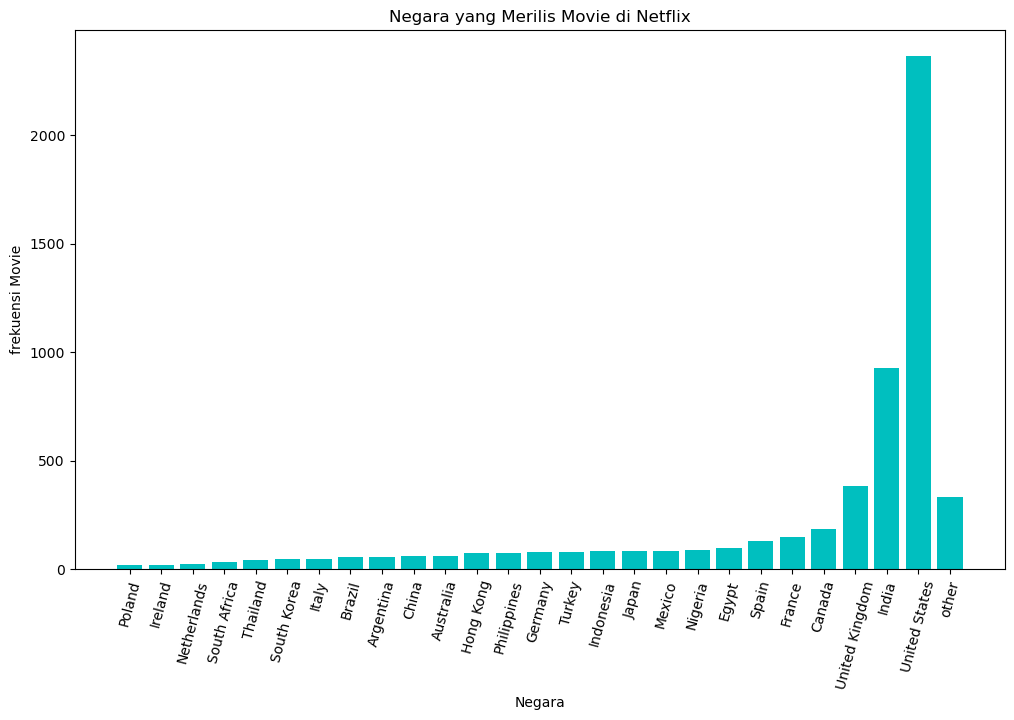

In [20]:
# Visualisas Data 
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(new.index,new['count'],color='c')
ax.set_xlabel('Negara')
ax.set_ylabel('frekuensi Movie')
ax.set_xticks(new.index)
ax.set_xticklabels(new.index, rotation=75)
ax.set_title('Negara yang Merilis Movie di Netflix')